## Imports

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import shutil
from multiprocessing import Pool

In [65]:
def copy_single_file(file_info):
    source, destination, file_name = file_info
    shutil.copy(os.path.join(source, file_name), os.path.join(destination, file_name))

def copy_files(files, source, destination, num_workers=4):
    file_info = [(source, destination, f) for f in files]
    with Pool(num_workers) as p:
        p.map(copy_single_file, file_info)

## Data exploration

In [66]:
normal_img_source = 'data/NORMAL/'
pneumonia_img_source = 'data/PNEUMONIA/'

img_paths = ['data/train', 'data/val', 'data/test']
for path in img_paths:
    os.makedirs(path + '/normal', exist_ok = True)
    os.makedirs(path + '/pneumonia', exist_ok = True)


Text(0.5, 1.0, 'Total data split')

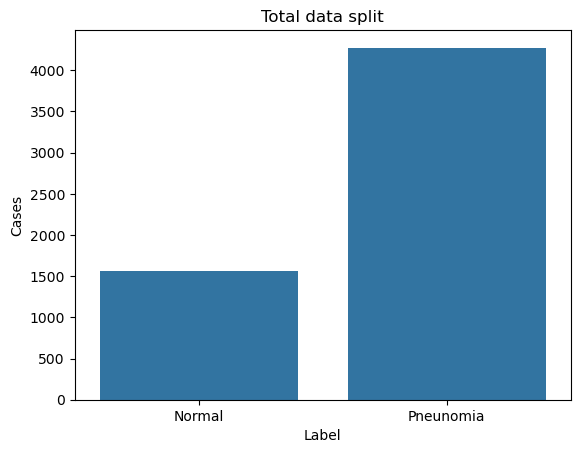

In [67]:
sns.barplot(x=['Normal', 'Pneunomia'], y = [len(imgs_normal), len(imgs_pneumonia)])
plt.ylabel('Cases')
plt.xlabel('Label')
plt.title('Total data split')

## Copy files to respective folders

In [68]:
imgs_normal = [image for image in os.listdir(normal_img_path)]
imgs_pneu = [image for image in os.listdir(pneumonia_img_path)]

train_normal, _ = train_test_split(imgs_normal, test_size = 0.4, random_state = 10)
val_normal, test_normal = train_test_split(_, test_size = 0.5, random_state = 10)
train_pneu, _ = train_test_split(imgs_pneu, test_size = 0.4, random_state = 10)
val_pneu, test_pneu = train_test_split(_, test_size = 0.5, random_state = 10)

all_normal_imgs = [train_normal, val_normal, test_normal]
all_pneu_imgs = [train_pneu, val_pneu, test_pneu]

print('Normal train/val/test: ', len(train_normal), len(val_normal), len(test_normal))
print('Pneumonia train/val/test: ', len(train_pneu), len(val_pneu), len(test_pneu))

Normal train/val/test:  937 312 313
Pneumonia train/val/test:  2564 855 855


In [70]:
num_workers = 8

for images, destination in zip(all_normal_imgs, img_paths):
    dest = destination + '/normal'
    copy_files(images, normal_img_source, dest, num_workers = num_workers)

for images, destination in zip(all_pneu_imgs, img_paths):
    dest = destination + '/pneumonia'
    copy_files(images, pneumonia_img_source, dest, num_workers = num_workers)